# Table of Contents

1. [Linear Regression](#linear)
2. [KNN Regressor](#KNN)
3. [Ridge Regression](#ridge)
4. [Lasso Regression](#lasso)
5. [Artificial Neural Network](#ANN)

After performing a lot of EDA on the dataset built off of the Spotify Audio Features metrics, I want to see if I can build a model that can predict a 'Four Tet style' songs' popularity based off of the Audio Features metrics I have.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('Four_Tet_Album_Data.csv')

df = df[df['tempo'] > 0]

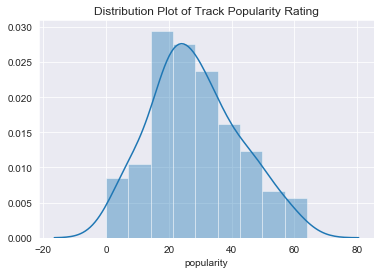

In [3]:
sns.distplot(df['popularity'])
plt.title('Distribution Plot of Track Popularity Rating')
plt.show()

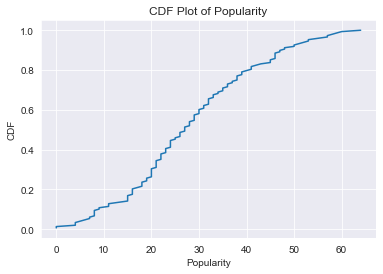

In [4]:
cdf_x = np.array(df['popularity'])
cdf_x = np.sort(df['popularity'])
cdf_y = np.arange(1, len(df['popularity']) + 1) / len(df['popularity'])

plt.plot(cdf_x, cdf_y)
plt.xlabel('Popularity')
plt.ylabel('CDF')
plt.title('CDF Plot of Popularity')
plt.show()

### 1. Linear Regression 
<a id='linear'></a>

In [5]:
len(cdf_x)

148

In [6]:
# Setting up the variables

X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
                          'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']].values
y = df['popularity'].values

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)

In [9]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

linear_model_pred = linear_model.predict(X_test_scaled)

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Mean Sqaured Error: %0.2f' % (mean_squared_error(y_test, linear_model_pred)))
print('Mean Sqaured Error: %0.2f' % (np.sqrt(mean_squared_error(y_test, linear_model_pred))))
print('Mean Absolute Error: %0.2f' % (mean_absolute_error(y_test, linear_model_pred)))
print('R-Squared %0.2f' % ())

Mean Sqaured Error: 186.86
Mean Sqaured Error: 13.67
Mean Absolute Error: 10.28


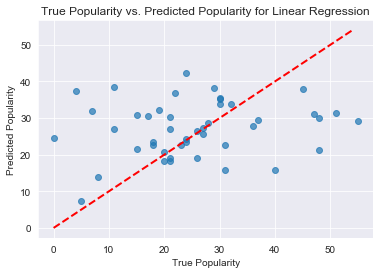

In [12]:
plt.scatter(y_test, linear_model_pred, alpha=0.7)
plt.plot(range(55), range(55), c='red', lw=2, ls='--')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.title('True Popularity vs. Predicted Popularity for Linear Regression')
plt.show()

## 2. KNN Regressor
<a id='KNN'></a>

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsRegressor()

parameters = {'n_neighbors': list(range(1, 51))}

knn_regressor = GridSearchCV(knn_model, parameters, cv=5)

knn_regressor.fit(X_train_scaled, y_train)

# Printing the best alpha as per the GridSearchCV
print(knn_regressor.best_params_)

# Printing the best neg MSE score per the GridSearch CV
print(knn_regressor.best_score_)

{'n_neighbors': 9}
-0.006515782856112184


In [15]:
knn_model = KNeighborsRegressor(n_neighbors=9)

knn_model.fit(X_train_scaled, y_train)

knn_pred_y = knn_model.predict(X_test_scaled)

In [16]:
print('Mean Sqaured Error: %0.2f' % (mean_squared_error(y_test, knn_pred_y)))
print('Mean Sqaured Error: %0.2f' % (np.sqrt(mean_squared_error(y_test, knn_pred_y))))
print('Mean Absolute Error: %0.2f' % (mean_absolute_error(y_test, knn_pred_y)))

Mean Sqaured Error: 195.62
Mean Sqaured Error: 13.99
Mean Absolute Error: 11.26


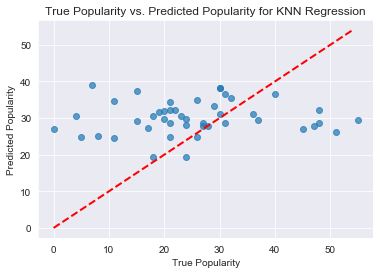

In [17]:
plt.scatter(y_test, knn_pred_y, alpha=0.7)
plt.plot(range(55), range(55), c='red', lw=2, ls='--')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.title('True Popularity vs. Predicted Popularity for KNN Regression')
plt.show()

## 3. Ridge Regression
<a id='ridge'></a>

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge()

# Creating a number of parameters of alpha to test with the Lasso object to determine which is the best
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Using GridSearch to find the optimal parameter of alpha for the ridge model with 5-Fold Cross Validation
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train_scaled, y_train)

# Printing the best alpha as per the GridSearchCV
print(ridge_regressor.best_params_)

# Printing the best neg MSE score per the GridSearch CV
print(ridge_regressor.best_score_)

{'alpha': 1}
-186.4050900608858


In [19]:
ridge = Ridge(alpha=1)

ridge.fit(X_train_scaled, y_train)

ridge_pred = ridge.predict(X_test_scaled)

In [20]:
print('Mean Sqaured Error: %0.2f' % (mean_squared_error(y_test, ridge_pred)))
print('Mean Sqaured Error: %0.2f' % (np.sqrt(mean_squared_error(y_test, ridge_pred))))
print('Mean Absolute Error: %0.2f' % (mean_absolute_error(y_test, ridge_pred)))

Mean Sqaured Error: 164.00
Mean Sqaured Error: 12.81
Mean Absolute Error: 9.92


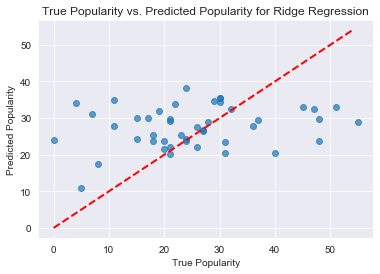

In [21]:
plt.scatter(y_test, ridge_pred, alpha=0.7)
plt.plot(range(55), range(55), c='red', lw=2, ls='--')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.title('True Popularity vs. Predicted Popularity for Ridge Regression')
plt.show()

## 4. Lasso Regression
<a id='lasso'></a>

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# Creating a number of parameters of alpha to test with the Lasso object to determine which is the best
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Using GridSearch to find the optimal parameter of alpha for the lasso model with 5-Fold Cross Validation
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train_scaled, y_train)

# Printing the best alpha as per the GridSearchCV
print(lasso_regressor.best_params_)

# Printing the best neg MSE score per the GridSearch CV
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-196.47392150286993


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527.2432091688088, tolerance: 1.7648109756097563
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345.9244963832316, tolerance: 1.8233804878048778
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.4171405686238, tolerance: 1.655912195121951
  model = cd_fast.enet_coordinate_descent(
/L

In [23]:
lasso = Lasso(alpha=0.01)

lasso.fit(X_train_scaled, y_train)

lasso_pred = lasso.predict(X_test_scaled)

In [24]:
print('Mean Sqaured Error: %0.2f' % (mean_squared_error(y_test, lasso_pred)))
print('Mean Sqaured Error: %0.2f' % (np.sqrt(mean_squared_error(y_test, lasso_pred))))
print('Mean Absolute Error: %0.2f' % (mean_absolute_error(y_test, lasso_pred)))

Mean Sqaured Error: 182.70
Mean Sqaured Error: 13.52
Mean Absolute Error: 10.19


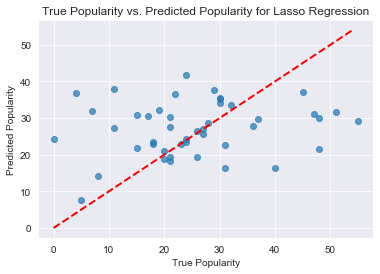

In [25]:
plt.scatter(y_test, lasso_pred, alpha=0.7)
plt.plot(range(55), range(55), c='red', lw=2, ls='--')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.title('True Popularity vs. Predicted Popularity for Lasso Regression')
plt.show()

## 5. Artificial Neural Network
<a id='ANN'></a>

In [26]:
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
                          'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']].values
y = df['popularity'].values

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [27]:
# Importing Sequential, Dense, Dropout and EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
# Building the model

ANN_model = Sequential()

ANN_model.add(Dense(11, activation='relu'))
ANN_model.add(Dense(7, activation='relu'))
ANN_model.add(Dense(4, activation='relu'))
ANN_model.add(Dropout(rate=0.4))
ANN_model.add(Dense(1))

ANN_model.compile(optimizer='adam', loss='mse')

In [29]:
# Creating an early stop

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
# Fitting the model

ANN_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, callbacks=[early_stop])

Epoch 1/200
4/4 [==============================] - 0s 50ms/step - loss: 1112.4708 - val_loss: 828.8035
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 1103.3707 - val_loss: 824.5167
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 1101.4749 - val_loss: 820.7134
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 1095.4677 - val_loss: 817.4373
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 1092.1892 - val_loss: 814.5972
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 1087.9556 - val_loss: 812.2090
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 1088.1166 - val_loss: 810.2324
Epoch 8/200
4/4 [==============================] - 0s 11ms/step - loss: 1084.2983 - val_loss: 808.5405
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 1084.3804 - val_loss: 807.1075
Epoch 10/200
4/4 [==============================] - 0s 14ms/step - loss: 

4/4 [==============================] - 0s 18ms/step - loss: 553.6266 - val_loss: 276.1449
Epoch 81/200
4/4 [==============================] - 0s 16ms/step - loss: 611.6562 - val_loss: 266.2703
Epoch 82/200
4/4 [==============================] - 0s 19ms/step - loss: 533.9474 - val_loss: 258.2340
Epoch 83/200
4/4 [==============================] - 0s 16ms/step - loss: 591.5731 - val_loss: 252.6553
Epoch 84/200
4/4 [==============================] - 0s 15ms/step - loss: 543.5059 - val_loss: 247.5573
Epoch 85/200
4/4 [==============================] - 0s 10ms/step - loss: 692.5311 - val_loss: 243.4011
Epoch 86/200
4/4 [==============================] - 0s 14ms/step - loss: 589.1099 - val_loss: 240.8451
Epoch 87/200
4/4 [==============================] - 0s 13ms/step - loss: 478.8786 - val_loss: 237.3728
Epoch 88/200
4/4 [==============================] - 0s 11ms/step - loss: 559.7050 - val_loss: 233.4082
Epoch 89/200
4/4 [==============================] - 0s 10ms/step - loss: 522.0515 - va

4/4 [==============================] - 0s 9ms/step - loss: 548.9456 - val_loss: 222.6166
Epoch 160/200
4/4 [==============================] - 0s 10ms/step - loss: 457.8112 - val_loss: 220.3757
Epoch 161/200
4/4 [==============================] - 0s 10ms/step - loss: 421.0022 - val_loss: 217.1700
Epoch 162/200
4/4 [==============================] - 0s 9ms/step - loss: 491.4796 - val_loss: 213.4602
Epoch 163/200
4/4 [==============================] - 0s 9ms/step - loss: 516.1062 - val_loss: 210.9510
Epoch 164/200
4/4 [==============================] - 0s 11ms/step - loss: 519.1503 - val_loss: 207.7844
Epoch 165/200
4/4 [==============================] - 0s 9ms/step - loss: 529.2130 - val_loss: 205.5754
Epoch 166/200
4/4 [==============================] - 0s 9ms/step - loss: 546.5272 - val_loss: 202.3442
Epoch 167/200
4/4 [==============================] - 0s 9ms/step - loss: 516.9706 - val_loss: 201.0727
Epoch 168/200
4/4 [==============================] - 0s 10ms/step - loss: 446.9377 -

In [31]:
# Putting the loss values throughout the model training into a dataframe

losses = pd.DataFrame(ANN_model.history.history)

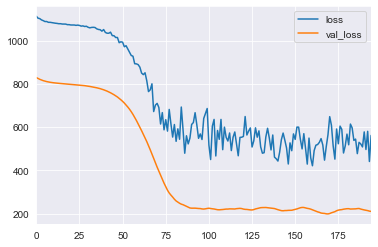

In [32]:
# Plotting the losses 

losses.plot()

In [33]:
# Creating predictions from the X_test_scaled data

predictions = ANN_model.predict(X_test_scaled)

# Evaluation the model by calculating the mean_squared_error, mean_absolute_error, and root_mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print('Mean Squared Error: {}'.format(mse))
print('Root Mean Squared Error: {}'.format(rmse))
print('Mean Absolute Error: {}'.format(mae))

Mean Squared Error: 209.85158000999056
Root Mean Squared Error: 14.486254864870718
Mean Absolute Error: 11.175214576721192


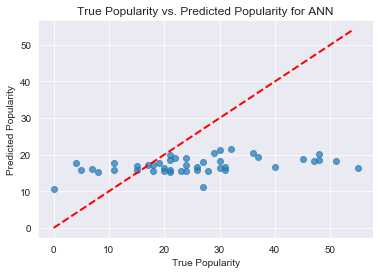

In [34]:
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot(range(55), range(55), c='red', lw=2, ls='--')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.title('True Popularity vs. Predicted Popularity for ANN')
plt.show()